###  Import the necessary libraries.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Load the customer_value_analysis.csv into the variable customer_df.


In [3]:
customer_df = pd.read_csv('customer_value_analysis.csv')

### First look at its main features (head, shape, info).


In [4]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.shape

(9134, 24)

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).


In [7]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
cols = []
for col in  customer_df.columns:
    cols.append(col.lower().replace(' ', '_'))

customer_df.columns = cols

In [9]:
 customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### Change effective to date column to datetime format.


In [10]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df.effective_to_date)

customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

### Check NaN values per column.


In [11]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### Define a functions that given an input dataframe, returns two dataframes: one with the numerical columns and another with categorical columns of the input dataframe.


In [12]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [13]:
def num_cat(df):
    numericals = df.select_dtypes('number')
    categoricals = df.select_dtypes('object')
    return numericals, categoricals

numericals, categoricals= num_cat(customer_df)

In [14]:
numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [15]:
categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### Drop any ID columns

In [16]:
categoricals = categoricals.drop(['customer'],axis=1)

In [17]:
categoricals

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### Get the correlation matrix for the numerical variables. What is pair of numerical variables that have the highest correlation? It makes sense, why?


In [18]:
correlations = customer_df.corr()

In [19]:
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


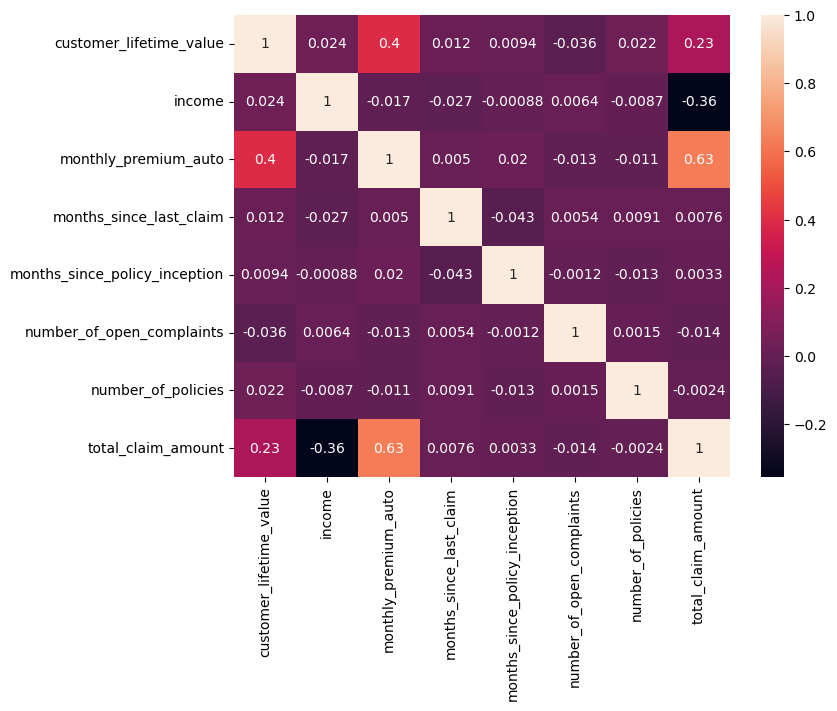

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(correlations, annot=True)
plt.show()

In [21]:
# 'monthly_premium_auto' and 'total_claim_amount' has the highest correlations. 
#It makes sense since the more amount you pay for auto insurance per month, the more claim amount you will get.

### Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.


In [22]:
numericals.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [23]:
def continuous_discrete(df, x=36):
    continuous = []
    discrete = []
    for col in df.columns:
        if  df[col].nunique() < x:
            discrete.append(col)
            discrete_df = df[discrete]
        else:
            continuous.append(col)
            continuous_df = df[continuous]
    return continuous_df,discrete_df


In [24]:
continuous_df,discrete_df = continuous_discrete(numericals, x=200)

In [25]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


In [26]:
discrete_df

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


### Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).


In [27]:
discrete_df.columns

Index(['months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')

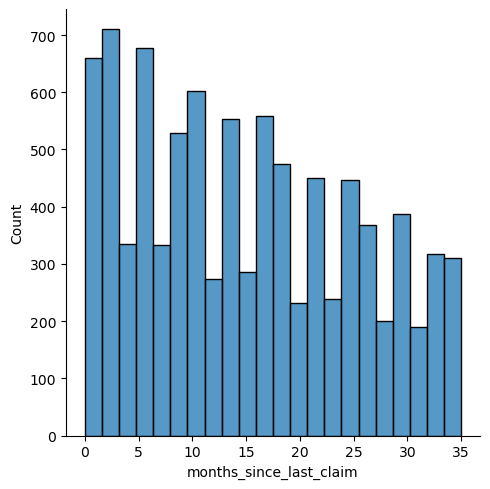

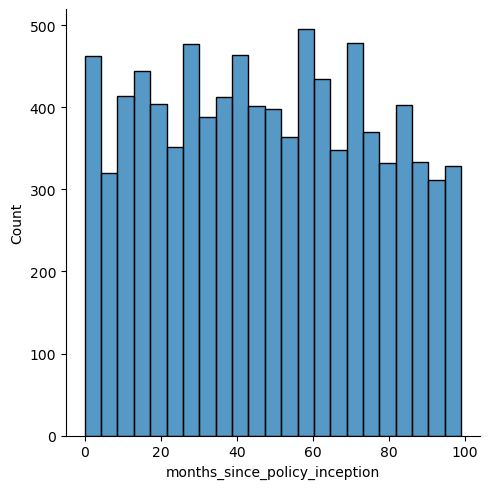

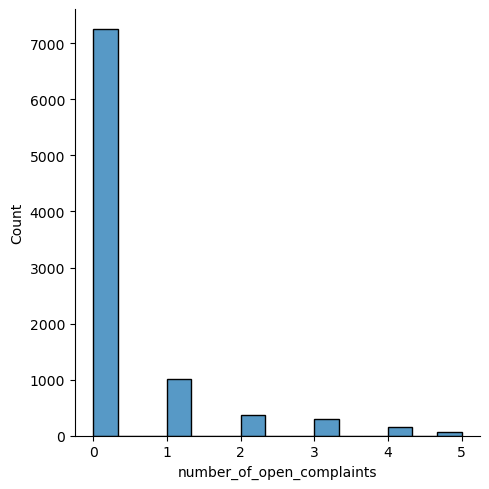

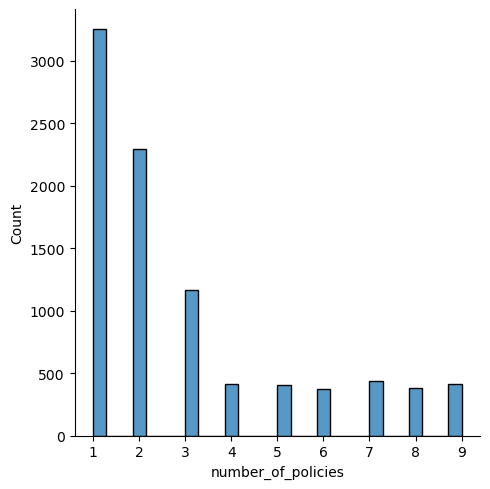

In [28]:
# I used barplot and figsize =(16,16), but the graphs are so weird, thus, i changed plot type.
def plot_distributions(df):
    for col in df:
        sns.displot(df[col])
        plt.show()
    
plot_distributions(discrete_df)

In [29]:
#another way for plotting, but the graphs are so weird.
#fig, ax = plt.subplots(2,2,figsize=(16,16))
#sns.barplot(x= 'months_since_last_claim', data= discrete_df,ax =ax[0,0]);
#sns.barplot(x= 'months_since_policy_inception', data= discrete_df,ax =ax[0,1])
#sns.barplot(x= 'number_of_open_complaints', data= discrete_df,ax =ax[1,0])
#sns.barplot(x= 'number_of_policies', data= discrete_df,ax =ax[1,1])
#plt.show()

### Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)


In [30]:
continuous_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'total_claim_amount'],
      dtype='object')

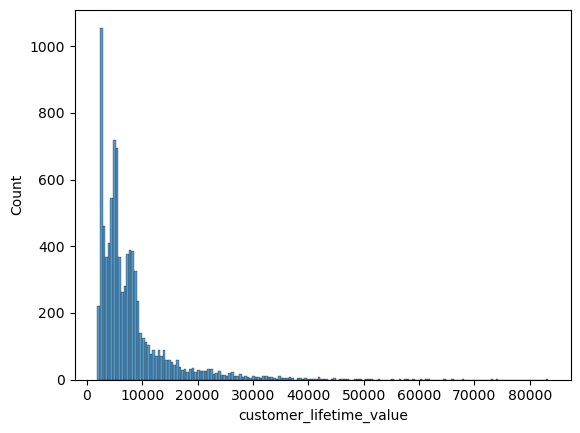

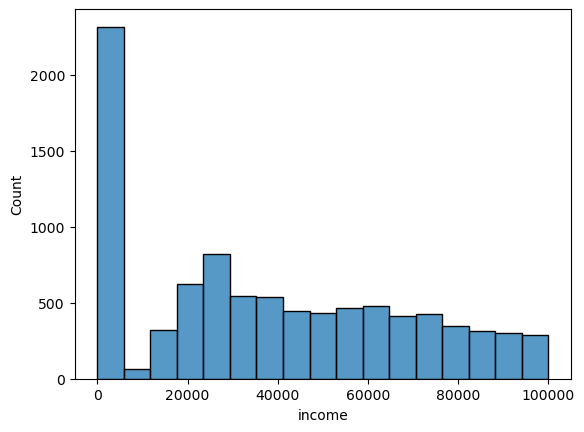

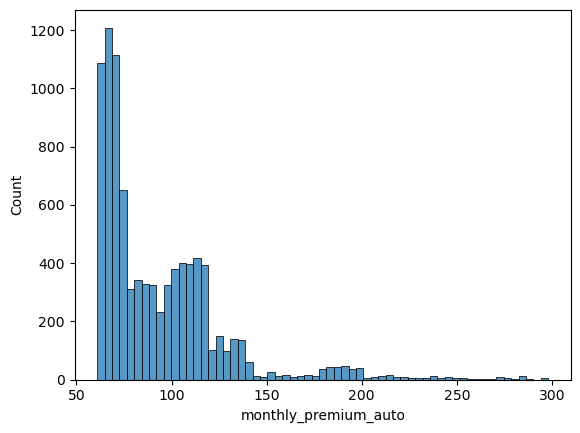

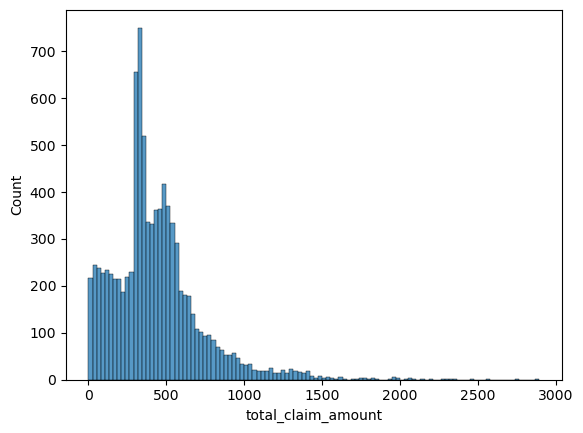

In [31]:
def plot_distributions(df):
    for column in df:
        sns.histplot(df[column])
        plt.show()
plot_distributions(continuous_df)

### According to the previous histogram plots, do you think that you do will have to apply any transformation?


In [32]:
# As we can see from previous histogram plots,all seem to be left skewed except 'months_since_policy_inception'. 
# Thus, i think we may need to do powertransform to make data more Gaussian-like.


### Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plots for the continuous_df.


/Users/yunlingge/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


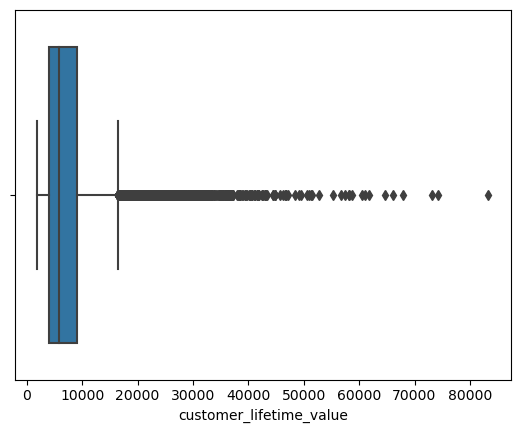

/Users/yunlingge/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


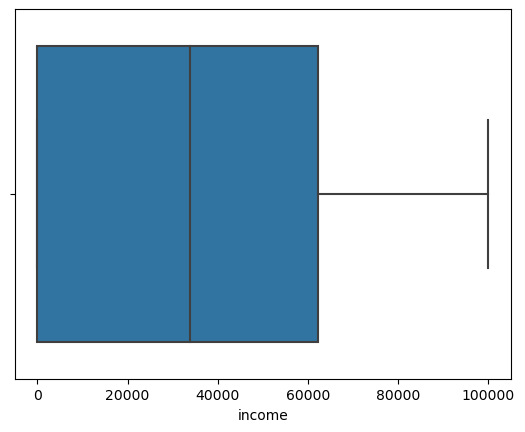

/Users/yunlingge/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


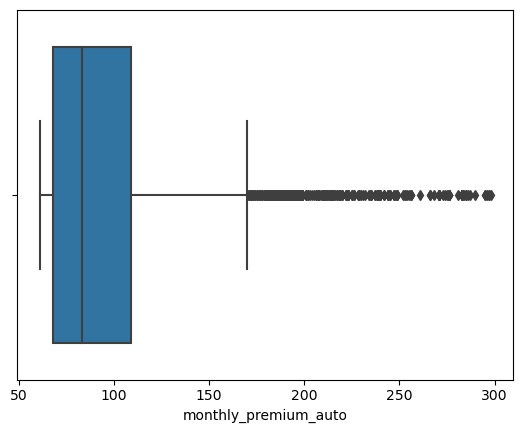

/Users/yunlingge/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


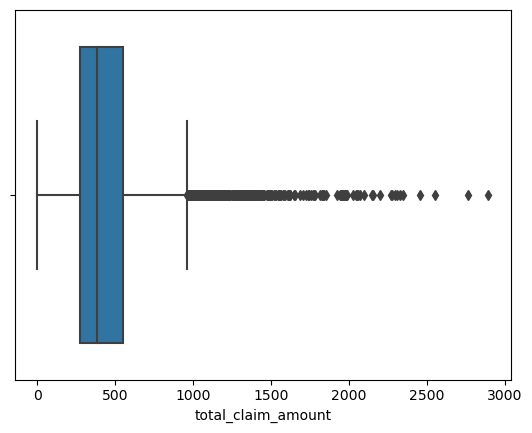

In [33]:
# in order to find outliers, we can apply box-plot.
def plot_distributions(df):
    for column in df:
        sns.boxplot(df[column])
        plt.show()
plot_distributions(continuous_df)

# Lab Cleaning Categorical Data

#### Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed in the y axis instead of the x one.


In [34]:
categoricals.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [35]:
for col in categoricals.columns:
    print('The most frequent value for column{} is {}'.format(col,categoricals[col].mode()[0]))

The most frequent value for columnstate is California
The most frequent value for columnresponse is No
The most frequent value for columncoverage is Basic
The most frequent value for columneducation is Bachelor
The most frequent value for columnemploymentstatus is Employed
The most frequent value for columngender is F
The most frequent value for columnlocation_code is Suburban
The most frequent value for columnmarital_status is Married
The most frequent value for columnpolicy_type is Personal Auto
The most frequent value for columnpolicy is Personal L3
The most frequent value for columnrenew_offer_type is Offer1
The most frequent value for columnsales_channel is Agent
The most frequent value for columnvehicle_class is Four-Door Car
The most frequent value for columnvehicle_size is Medsize


In [36]:
for col in categoricals.columns:
    print('The unique value for column{} is {}'.format(col, categoricals[col].nunique()))

The unique value for columnstate is 5
The unique value for columnresponse is 2
The unique value for columncoverage is 3
The unique value for columneducation is 5
The unique value for columnemploymentstatus is 5
The unique value for columngender is 2
The unique value for columnlocation_code is 3
The unique value for columnmarital_status is 3
The unique value for columnpolicy_type is 3
The unique value for columnpolicy is 9
The unique value for columnrenew_offer_type is 4
The unique value for columnsales_channel is 4
The unique value for columnvehicle_class is 6
The unique value for columnvehicle_size is 3


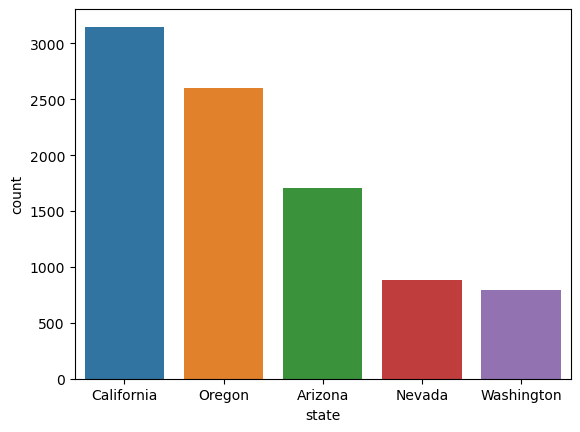

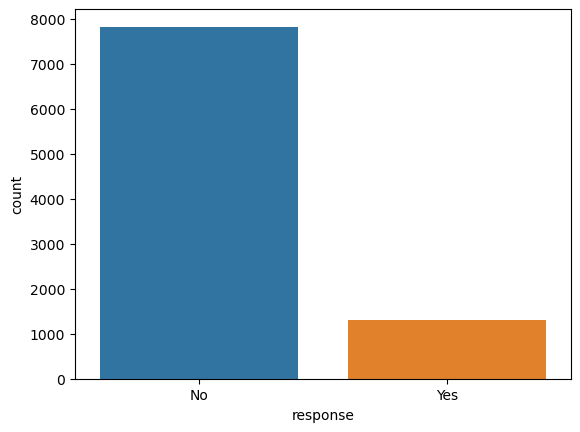

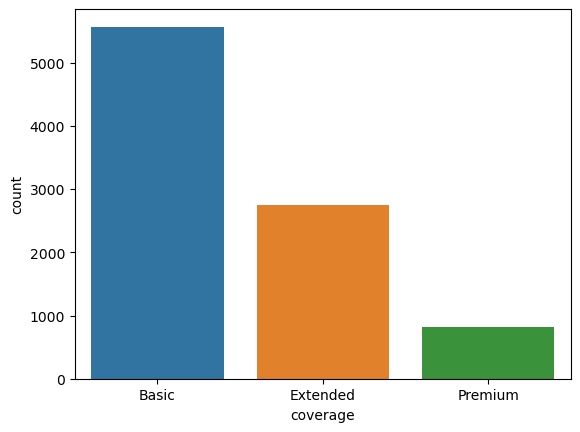

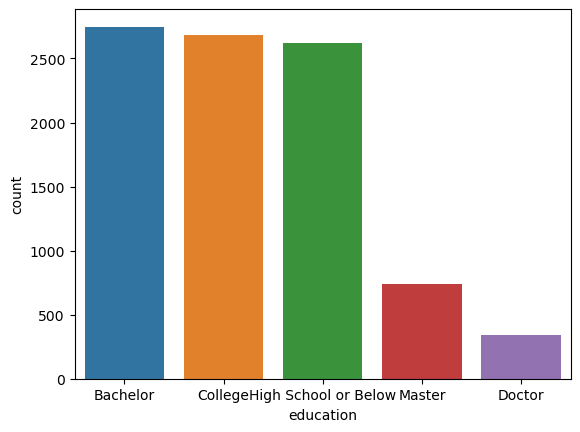

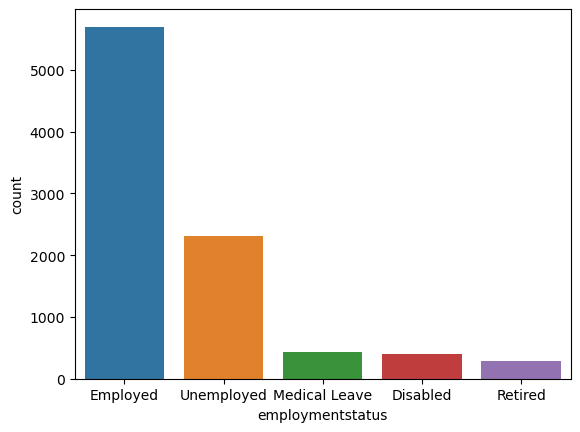

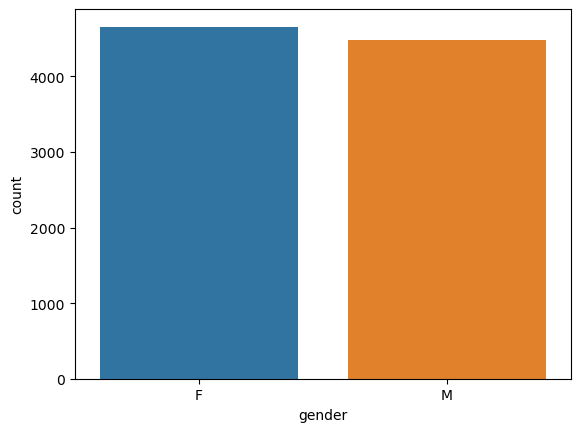

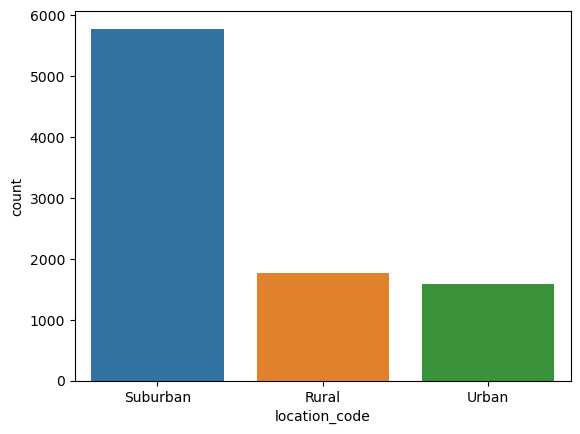

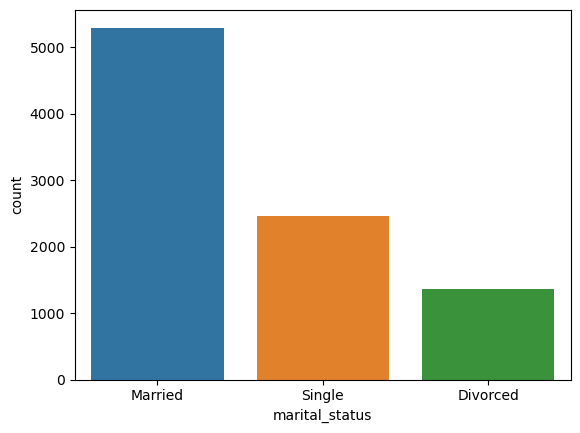

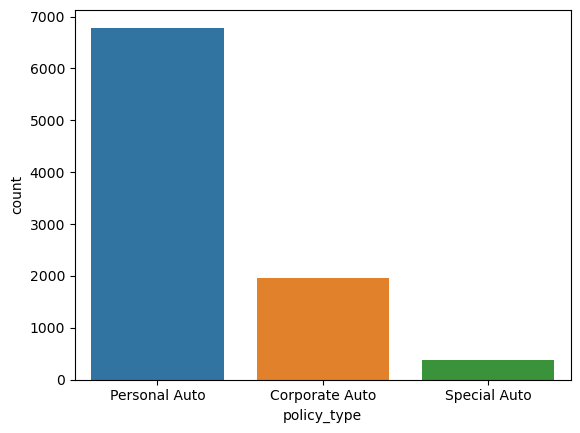

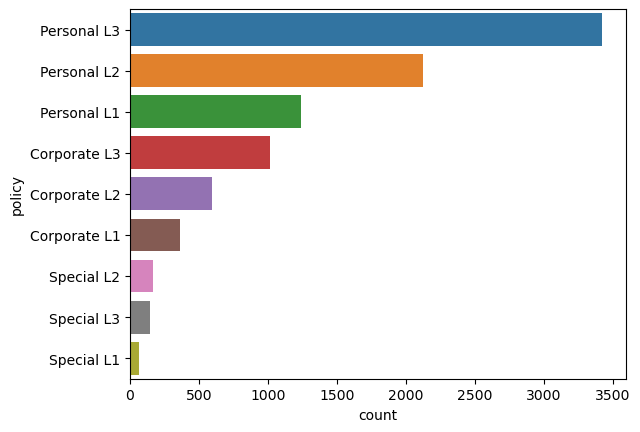

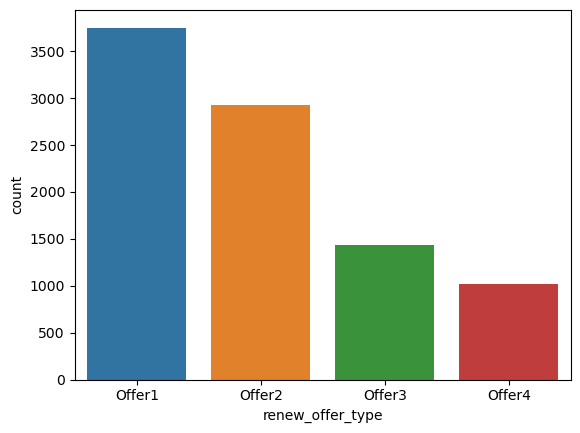

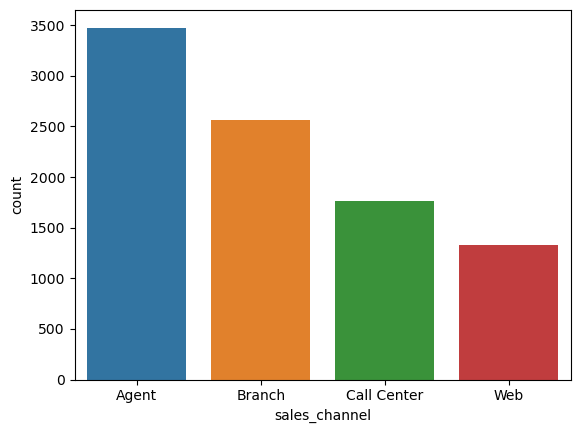

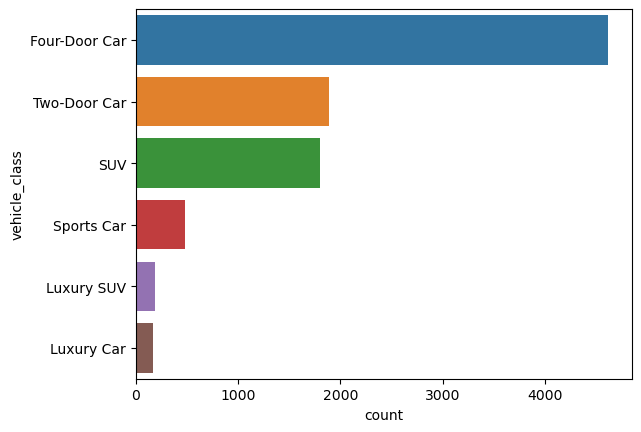

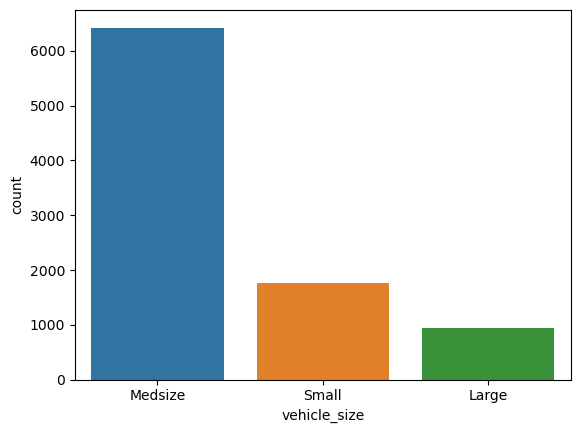

In [37]:
def plot_distributions(df):
    for col in df:
        if df[col].nunique() >= 6:
            sns.countplot(data = categoricals,y = df[col],order =df[col].value_counts(dropna=False).index)
            plt.show()
        else:
            sns.countplot(data = categoricals,x = df[col],order = df[col].value_counts(dropna=False).index)
            plt.show()
plot_distributions(categoricals)

#### policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with a OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.


In [38]:
# drop policy_type column
categoricals = categoricals.drop(['policy_type'],axis=1)
categoricals 

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large


In [39]:
categoricals['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [40]:
def clean_policy(policy):
    if policy in ['Personal L1','Corporate L1','Special L1']:
        return 'L1'
    elif policy in ['Personal L2','Corporate L2','Special L2']:
        return 'L2'
    else:
        return 'L3'
categoricals['policy'] = categoricals['policy'].apply(clean_policy)

In [41]:
categoricals['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

#### Time dependency analysis. Use a seaborn lineplot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)


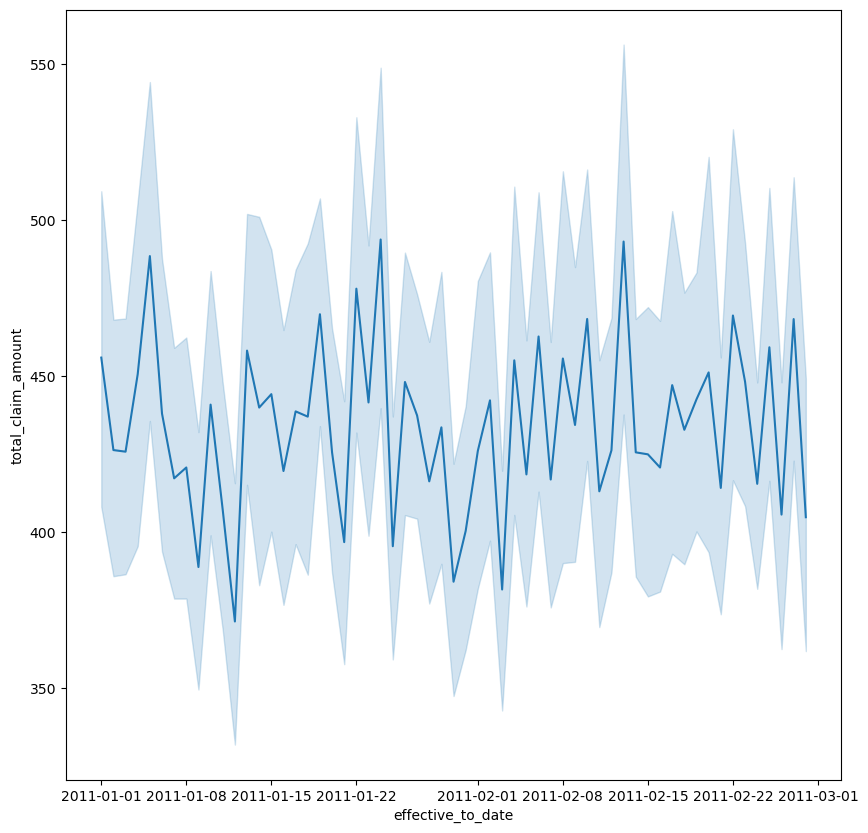

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data = customer_df, x ='effective_to_date', y ='total_claim_amount')
plt.show()


#### To continue the analysis define an empty pandas DataFrame, and add the following new columns:
- day with the day number of effective_to_date
- day_name with the day NAME of effective_to_date
- week with the week of effective_to_date
- month with the month NAME of effective_to_date
- total_claim_amount with total_claim_amount


In [43]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [44]:
df_new = pd.DataFrame()

In [45]:
df_new['day'] = customer_df['effective_to_date'].dt.day
df_new['day']

0       24
1       31
2       19
3       20
4        3
        ..
9129    10
9130    12
9131     6
9132     3
9133    14
Name: day, Length: 9134, dtype: int64

In [46]:
df_new['day_name']= customer_df['effective_to_date'].dt.day_name()
df_new['day_name']

0       Thursday
1         Monday
2       Saturday
3       Thursday
4       Thursday
          ...   
9129    Thursday
9130    Saturday
9131      Sunday
9132    Thursday
9133      Monday
Name: day_name, Length: 9134, dtype: object

In [47]:
df_new['week']= customer_df['effective_to_date'].dt.week
df_new['week']

/var/folders/vm/q28pb78130n5_lnd8k2t837h0000gn/T/ipykernel_50302/2059350632.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_new['week']= customer_df['effective_to_date'].dt.week


0       8
1       5
2       7
3       3
4       5
       ..
9129    6
9130    6
9131    5
9132    5
9133    7
Name: week, Length: 9134, dtype: int64

In [48]:
df_new['month']= customer_df['effective_to_date'].dt.month_name()
df_new['month']

0       February
1        January
2       February
3        January
4       February
          ...   
9129    February
9130    February
9131    February
9132    February
9133    February
Name: month, Length: 9134, dtype: object

In [49]:
df_new['total_claim_amount']= customer_df['total_claim_amount']
df_new['total_claim_amount']

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

In [50]:
df_new

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764
9130,12,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


#### Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)


In [51]:
# I didn't see a column named 'target', i guess it is 'total_claim_amount'; 
# list_of_correct_days is not defined. so i can't use it. 

In [52]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [53]:
claim_by_day = df_new.groupby(['day_name']).agg({'total_claim_amount':sum}).round(2).reindex(index=['Monday',
                                                                 'Tuesday',
                                                                 'Wednesday',
                                                                 'Thursday',
                                                                 'Friday',
                                                                 'Saturday',
                                                                 'Sunday'])

claim_by_day 

,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


#### Use a seaborn lineplot to plot the previous series. Do you see some differences by day of the week?


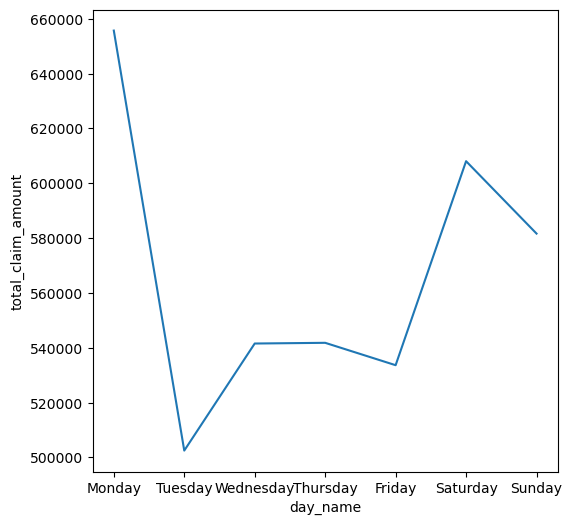

In [54]:
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(data = claim_by_day, x ='day_name', y ='total_claim_amount')
plt.show()

#### Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)


In [55]:
claim_by_week = df_new.groupby(['day_name']).agg({'total_claim_amount':'count'}).round(2).reindex(index=['Monday',
                                                                 'Tuesday',
                                                                 'Wednesday',
                                                                 'Thursday',
                                                                 'Friday',
                                                                 'Saturday',
                                                                 'Sunday'])

claim_by_week

,total_claim_amount
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


#### Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()


In [56]:
target_median = df_new.groupby('day_name').agg({'total_claim_amount':'median'}).sort_values(by='total_claim_amount').reset_index()
target_median

,day_name,total_claim_amount
0,Friday,371.803029
1,Tuesday,378.490829
2,Saturday,379.200000
3,Sunday,383.721164
4,Monday,385.735705
5,Wednesday,392.235698
6,Thursday,395.328407


#### Plot the median "target" by day of the week name using a seaborn barplot


<AxesSubplot:xlabel='day_name', ylabel='total_claim_amount'>

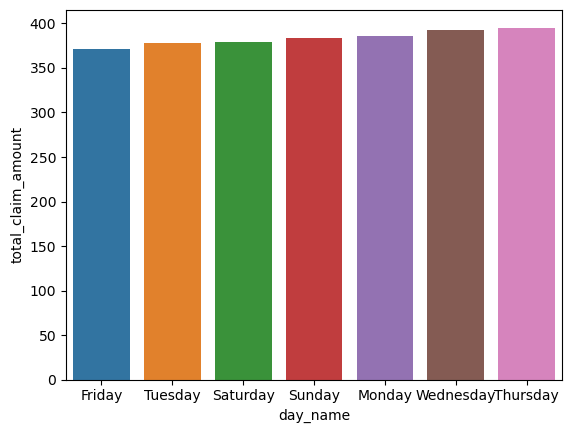

In [57]:
sns.barplot(data = target_median, x='day_name', y='total_claim_amount')

#### What do you can conclude from this analysis?


As I can see from the plot, there is not much difference among the median of total claim amount in the whole week.Friday is the smallest median while Thursday has the largest median.

#### Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)


In [58]:
df_new['month'].unique()

array(['February', 'January'], dtype=object)

In [59]:
df_new.groupby('month').agg({'total_claim_amount':
                                          'sum'}).round(2).reindex(index={'January','February'})

,total_claim_amount
month,
February,1847824.19
January,2117142.86


#### Can you do a monthly analysis given the output of the previous series? Why?


Not really since we lack data from other months.

#### Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).


In [60]:
def clean_outlier(column):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(column), [25, 75])
 
    # compute IQR
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (3 * iqr)
    upper_bound = q3 + (3 * iqr)
 
    outliers = [x for x in column if x <= lower_bound or x >= upper_bound]
 
    return outliers

#### Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.


In [61]:
continuous_df.apply(clean_outlier)

customer_lifetime_value    [24127.50402, 24127.50402, 36707.42639, 33473....
income                                                                    []
monthly_premium_auto       [237, 255, 245, 244, 276, 253, 271, 271, 295, ...
total_claim_amount         [1836.0, 2345.413441, 2027.724442, 1382.4, 157...
dtype: object

####  Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.


In [62]:
df_final = pd.concat([categoricals,df_new['day_name'],discrete_df,continuous_df], axis=1).dropna()

In [63]:
df_final

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,vehicle_size,day_name,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,Medsize,Thursday,32,5,0,1,2763.519279,56274,69,384.811147
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,...,Medsize,Monday,13,42,0,8,6979.535903,0,94,1131.464935
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,...,Medsize,Saturday,18,38,0,2,12887.431650,48767,108,566.472247
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,...,Medsize,Thursday,18,65,0,7,7645.861827,0,106,529.881344
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,...,Medsize,Thursday,12,44,0,1,2813.692575,43836,73,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,L1,Offer2,...,Medsize,Thursday,18,89,0,2,23405.987980,71941,73,198.234764
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,...,Medsize,Saturday,14,28,0,1,3096.511217,21604,79,379.200000
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,...,Medsize,Sunday,9,37,3,2,8163.890428,0,85,790.784983
9132,California,No,Extended,College,Employed,M,Suburban,Married,L2,Offer3,...,Large,Thursday,34,3,0,3,7524.442436,21941,96,691.200000


#### Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.


In [64]:
#it is already at the last column

#### Turn the response column values into (Yes=1/No=0).


In [65]:
df_final['response']

0        No
1        No
2        No
3        No
4        No
       ... 
9129     No
9130    Yes
9131     No
9132     No
9133     No
Name: response, Length: 9134, dtype: object

In [66]:
df_final.response=df_final.response.replace({'Yes': 1, 'No': 0})

In [67]:
df_final['response']

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: response, Length: 9134, dtype: int64

#### Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.


In [68]:
def reduce_imbalance(x):
    if x in ('Master','Doctor'):
        return 'Graduate'
    else:
        return x

In [69]:
df_final.education = df_final.education.apply(reduce_imbalance)

In [70]:
df_final.education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Graduate                1083
Name: education, dtype: int64

#### Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.


In [71]:
df_final.employmentstatus=df_final.employmentstatus.apply(lambda x: 'Inactive' if x in ('Medical Leave', 'Disabled', 'Retired') else x)

In [72]:
df_final.employmentstatus

0         Employed
1       Unemployed
2         Employed
3       Unemployed
4         Employed
           ...    
9129      Employed
9130      Employed
9131    Unemployed
9132      Employed
9133    Unemployed
Name: employmentstatus, Length: 9134, dtype: object

In [73]:
df_final.employmentstatus.value_counts()

Employed      5698
Unemployed    2317
Inactive      1119
Name: employmentstatus, dtype: int64

#### Deal with column Gender turning the values into (1/0).


In [74]:
df_final['gender']

0       F
1       F
2       F
3       M
4       M
       ..
9129    M
9130    F
9131    M
9132    M
9133    M
Name: gender, Length: 9134, dtype: object

In [75]:
# Male =1, Female=0
df_final.gender = df_final.gender.apply(lambda x: '1' if x in ('M') else ('0'))
df_final.gender

0       0
1       0
2       0
3       1
4       1
       ..
9129    1
9130    0
9131    1
9132    1
9133    1
Name: gender, Length: 9134, dtype: object

#### Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.


In [76]:
df_final.vehicle_class=df_final.vehicle_class.apply(lambda x: 'Luxury' if x in ('Sports Car','Luxury SUV','Luxury Car') else x)
df_final.vehicle_class.value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: vehicle_class, dtype: int64

#### Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".


In [77]:
def func_coverage(x):
    if x in 'Basic':
        return '1'
    elif x in 'Extended':
        return '2'
    else:
        return '3'

In [78]:
df_final.coverage=df_final.coverage.apply(func_coverage)

In [79]:
df_final.coverage

0       1
1       2
2       3
3       1
4       1
       ..
9129    1
9130    2
9131    2
9132    2
9133    2
Name: coverage, Length: 9134, dtype: object

#### Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".


In [80]:
df_final['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
Inactive      1119
Name: employmentstatus, dtype: int64

In [81]:
def func_employment(x): #defining function
    if x in 'Employed':
        return '1'
    elif x in 'Inactive':
        return '2'
    else:
        return '3'

In [82]:
df_final.employmentstatus=df_final.employmentstatus.apply(func_employment)

In [83]:
df_final.employmentstatus

0       1
1       3
2       1
3       3
4       1
       ..
9129    1
9130    1
9131    3
9132    1
9133    3
Name: employmentstatus, Length: 9134, dtype: object

#### Encode the column location_code as: "Urban" > "Suburban" > "Rural".


In [84]:
def func_location(x): 
    if x in 'Urban':
        return '3'
    elif x in 'Suburban':
        return '2'
    else:
        return '1'

In [85]:
df_final.location_code=df_final.location_code.apply(func_location) #applying the function

In [86]:
df_final.location_code

0       2
1       2
2       2
3       2
4       1
       ..
9129    3
9130    2
9131    2
9132    2
9133    2
Name: location_code, Length: 9134, dtype: object

#### Encode the column vehicle_size as: "Large" > "Medsize" > "Small".


In [87]:
def func_vehicle(x):
    if x in 'Large':
        return '3'
    elif x in 'Medsize':
        return '2'
    else:
        return '1'

In [88]:
df_final.vehicle_size=df_final.vehicle_size.apply(func_vehicle) 

In [89]:
df_final.vehicle_size

0       2
1       2
2       2
3       2
4       2
       ..
9129    2
9130    2
9131    2
9132    3
9133    2
Name: vehicle_size, Length: 9134, dtype: object

#### Get a dataframe with the categorical nominal columns


In [90]:
df_nominal = df_final[['state','education','marital_status','policy',
                'renew_offer_type','sales_channel','vehicle_class',
               'day_name']]

In [91]:
df_nominal.head()

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day_name
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Thursday
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car,Monday
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Saturday
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV,Thursday
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,Thursday


#### Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie: levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]



In [92]:
nominal_columns = ['state','education','marital_status','policy',
                'renew_offer_type','sales_channel','vehicle_class',
               'day_name']
list_levels = []
for i in nominal_columns: list_levels.append(list(df_final[i].unique()))
list_levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 ['Married', 'Single', 'Divorced'],
 ['L3', 'L2', 'L1'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'],
 ['Thursday',
  'Monday',
  'Saturday',
  'Tuesday',
  'Wednesday',
  'Sunday',
  'Friday']]

#### Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels


In [93]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories = list_levels)

encoded_df = encoder.fit_transform(df_nominal).toarray()

encoded_df = pd.DataFrame(encoded_df, columns = encoder.get_feature_names_out())

In [94]:
encoded_df

,state_Arizona,state_Nevada,state_California,state_Oregon,education_College,education_Graduate,education_High School or Below,marital_status_Single,marital_status_Divorced,policy_L2,...,sales_channel_Branch,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Luxury,day_name_Monday,day_name_Saturday,day_name_Tuesday,day_name_Wednesday,day_name_Sunday,day_name_Friday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9130,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9131,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Lab_comparing_regression_models

#### Define X and y


In [96]:
df_final

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,vehicle_size,day_name,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,Washington,0,1,Bachelor,1,0,2,Married,L3,Offer1,...,2,Thursday,32,5,0,1,2763.519279,56274,69,384.811147
1,Arizona,0,2,Bachelor,3,0,2,Single,L3,Offer3,...,2,Monday,13,42,0,8,6979.535903,0,94,1131.464935
2,Nevada,0,3,Bachelor,1,0,2,Married,L3,Offer1,...,2,Saturday,18,38,0,2,12887.431650,48767,108,566.472247
3,California,0,1,Bachelor,3,1,2,Married,L2,Offer1,...,2,Thursday,18,65,0,7,7645.861827,0,106,529.881344
4,Washington,0,1,Bachelor,1,1,1,Single,L1,Offer1,...,2,Thursday,12,44,0,1,2813.692575,43836,73,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,0,1,Bachelor,1,1,3,Married,L1,Offer2,...,2,Thursday,18,89,0,2,23405.987980,71941,73,198.234764
9130,California,1,2,College,1,0,2,Divorced,L3,Offer1,...,2,Saturday,14,28,0,1,3096.511217,21604,79,379.200000
9131,California,0,2,Bachelor,3,1,2,Single,L2,Offer1,...,2,Sunday,9,37,3,2,8163.890428,0,85,790.784983
9132,California,0,2,College,1,1,2,Married,L2,Offer3,...,3,Thursday,34,3,0,3,7524.442436,21941,96,691.200000


In [97]:
y=df_final['total_claim_amount']
X=df_final.drop(['total_claim_amount'],axis=1)

In [98]:
X.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,vehicle_class,vehicle_size,day_name,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto
0,Washington,0,1,Bachelor,1,0,2,Married,L3,Offer1,...,Two-Door Car,2,Thursday,32,5,0,1,2763.519279,56274,69
1,Arizona,0,2,Bachelor,3,0,2,Single,L3,Offer3,...,Four-Door Car,2,Monday,13,42,0,8,6979.535903,0,94
2,Nevada,0,3,Bachelor,1,0,2,Married,L3,Offer1,...,Two-Door Car,2,Saturday,18,38,0,2,12887.431650,48767,108
3,California,0,1,Bachelor,3,1,2,Married,L2,Offer1,...,SUV,2,Thursday,18,65,0,7,7645.861827,0,106
4,Washington,0,1,Bachelor,1,1,1,Single,L1,Offer1,...,Four-Door Car,2,Thursday,12,44,0,1,2813.692575,43836,73


#### Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 21)
(2741, 21)
(6393,)
(2741,)


#### Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)


In [103]:
X_train_cat= X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes('number')
X_test_cat = X_test.select_dtypes('object')
X_test_num = X_test.select_dtypes('number')

In [107]:
X_train_cat.columns

Index(['state', 'coverage', 'education', 'employmentstatus', 'gender',
       'location_code', 'marital_status', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'day_name'],
      dtype='object')

In [108]:
X_train_num.columns

Index(['response', 'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'customer_lifetime_value', 'income', 'monthly_premium_auto'],
      dtype='object')

In [109]:
X_test_cat.columns

Index(['state', 'coverage', 'education', 'employmentstatus', 'gender',
       'location_code', 'marital_status', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'day_name'],
      dtype='object')

In [110]:
X_test_num.columns

Index(['response', 'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'customer_lifetime_value', 'income', 'monthly_premium_auto'],
      dtype='object')

#### Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use .toarray() after .transform() to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using encoder.get_feature_names_out() and the same indexes of X_train_cat and X_test_cat


In [128]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(X_train_cat) 
encoded_train = encoder_train.transform(X_train_cat).toarray()
X_train_cat_encoded_df = pd.DataFrame(encoded_train,columns=encoder_train.get_feature_names_out())
X_train_cat_encoded_df.head()

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,coverage_1,coverage_2,coverage_3,education_Bachelor,education_College,...,vehicle_size_1,vehicle_size_2,vehicle_size_3,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [129]:
encoded_test = encoder_test.transform(X_test_cat).toarray()
X_test_cat_encoded_df = pd.DataFrame(encoded_test,columns=encoder_test.get_feature_names_out())
X_test_cat_encoded_df.head()

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,coverage_1,coverage_2,coverage_3,education_Bachelor,education_College,...,vehicle_size_1,vehicle_size_2,vehicle_size_3,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as: X_train_num_transformed_df and X_test_num_transformed_df


In [122]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
transformer.fit(X_train_num)
X_train_num_transformed = transformer.transform(X_train_num)
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns)
X_train_num_transformed_df

,response,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto
0,-0.413375,0.048267,0.269416,-0.513111,-0.064941,0.499021,0.021464,-0.633251
1,2.419109,1.653602,0.236349,2.009990,1.132407,-0.467968,-1.649407,-0.566921
2,-0.413375,-1.476582,0.653360,-0.513111,0.514553,-0.067597,0.754866,-0.772902
3,-0.413375,-0.840605,-0.509404,-0.513111,1.462547,0.379093,0.535860,0.542226
4,-0.413375,0.142059,0.957827,1.898546,-1.149461,-0.415574,1.084631,1.038549
...,...,...,...,...,...,...,...,...
6388,-0.413375,0.322050,0.169661,-0.513111,1.670486,1.496427,0.511091,2.080889
6389,-0.413375,1.523604,0.302304,1.996047,-0.064941,1.121229,1.007366,0.928034
6390,2.419109,0.575934,1.308105,-0.513111,-1.149461,-0.403507,0.942005,0.995772
6391,-0.413375,-1.962537,1.192998,-0.513111,-1.149461,-1.896152,-1.649407,-1.443940


In [123]:
transformer.fit(X_test_num)
X_test_num_transformed = transformer.transform(X_test_num)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns)
X_test_num_transformed_df

,response,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto
0,-0.398115,-0.950802,-0.345948,-0.500351,0.535333,-0.186121,1.056143,-1.180355
1,-0.398115,1.136199,-0.309542,-0.500351,-1.137462,-0.617099,0.281695,0.723148
2,-0.398115,-0.950802,0.562103,1.955432,1.328510,0.820340,0.806508,1.278013
3,-0.398115,0.601614,0.655476,1.955432,-0.043202,1.577912,-1.621779,-0.936807
4,-0.398115,0.168456,1.164247,-0.500351,-1.137462,-1.374351,-1.621779,-0.179682
...,...,...,...,...,...,...,...,...
2736,-0.398115,1.277485,0.467491,-0.500351,-1.137462,-1.368983,0.526170,-0.788469
2737,-0.398115,-0.224435,0.530707,-0.500351,-1.137462,-1.612003,0.751265,-1.452902
2738,-0.398115,-1.100118,1.589398,1.955432,-1.137462,-0.090450,0.979687,1.392930
2739,-0.398115,1.277485,1.135177,-0.500351,-1.137462,-0.583399,0.695583,0.723148


#### Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new


In [131]:
X_train_new = pd.concat([X_train_num_transformed_df,X_train_cat_encoded_df],axis=1)
X_train_new.head()

,response,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,state_Arizona,state_California,...,vehicle_size_1,vehicle_size_2,vehicle_size_3,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,-0.413375,0.048267,0.269416,-0.513111,-0.064941,0.499021,0.021464,-0.633251,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.419109,1.653602,0.236349,2.009990,1.132407,-0.467968,-1.649407,-0.566921,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.413375,-1.476582,0.653360,-0.513111,0.514553,-0.067597,0.754866,-0.772902,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.413375,-0.840605,-0.509404,-0.513111,1.462547,0.379093,0.535860,0.542226,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.413375,0.142059,0.957827,1.898546,-1.149461,-0.415574,1.084631,1.038549,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [132]:
X_test_new = pd.concat([X_test_num_transformed_df,X_test_cat_encoded_df],axis=1)
X_test_new.head()

,response,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,state_Arizona,state_California,...,vehicle_size_1,vehicle_size_2,vehicle_size_3,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,-0.398115,-0.950802,-0.345948,-0.500351,0.535333,-0.186121,1.056143,-1.180355,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.398115,1.136199,-0.309542,-0.500351,-1.137462,-0.617099,0.281695,0.723148,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.398115,-0.950802,0.562103,1.955432,1.328510,0.820340,0.806508,1.278013,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.398115,0.601614,0.655476,1.955432,-0.043202,1.577912,-1.621779,-0.936807,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.398115,0.168456,1.164247,-0.500351,-1.137462,-1.374351,-1.621779,-0.179682,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as: X_train_new_scaled_df and X_test_new_scaled_df


In [133]:
from sklearn.preprocessing import MinMaxScaler 
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_train_new) 
X_train_new_scaled = MinMaxtransformer.transform(X_train_new)
X_train_new_scaled_df = pd.DataFrame(X_train_new_scaled,columns=X_train_new.columns) 
X_train_new_scaled_df.head()

,response,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,state_Arizona,state_California,...,vehicle_size_1,vehicle_size_2,vehicle_size_3,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.0,0.556064,0.632631,0.000000,0.384589,0.546689,0.603173,0.237950,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.000000,0.623798,0.998217,0.809188,0.355690,0.000000,0.255297,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.134385,0.735197,0.000000,0.590087,0.434771,0.867927,0.201428,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.310257,0.424579,0.000000,0.926261,0.523000,0.788867,0.545367,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.582001,0.816531,0.954127,0.000000,0.366039,0.986970,0.675168,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [134]:
X_test_new_scaled = MinMaxtransformer.transform(X_test_new)
X_test_new_scaled_df = pd.DataFrame(X_test_new_scaled,columns=X_test_new.columns) 
X_test_new_scaled_df.head()

,response,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,state_Arizona,state_California,...,vehicle_size_1,vehicle_size_2,vehicle_size_3,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.005388,0.279783,0.468244,0.005048,0.597456,0.411360,0.976686,0.094869,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.005388,0.856918,0.477970,0.005048,0.004255,0.326233,0.697115,0.592682,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.005388,0.279783,0.710819,0.976632,0.878730,0.610155,0.886569,0.737793,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005388,0.709085,0.735762,0.976632,0.392298,0.759790,0.009974,0.158562,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.005388,0.589301,0.871674,0.005048,0.004255,0.176662,0.009974,0.356570,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets


In [136]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_new_scaled_df,y_train)

LinearRegression()

In [138]:
y_pred_train = lm.predict(X_train_new_scaled_df)
y_pred_test = lm.predict(X_test_new_scaled_df)

#### Create a function that given a model prediction and real values returns a pandas dataframe with the following table:


In [162]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

In [172]:
mae_train= mean_absolute_error(y_train,y_pred_train)
mae_train

105.08839193774442

In [173]:
mae_test= mean_absolute_error(y_test,y_pred_test)
mae_test

107.28694883254285

In [174]:
mse_train= mean_squared_error(y_train,y_pred_train)
mse_train

24272.036224343174

In [175]:
mse_test= mean_squared_error(y_test,y_pred_test)
mse_test

25369.5537010714

In [176]:
rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_train

155.79485300979354

In [177]:
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse_test

159.27822732900879

In [179]:
mape_train=mean_absolute_percentage_error(y_train,y_pred_train)
mape_train

0.8056555576290269

In [180]:
mape_test=mean_absolute_percentage_error(y_test,y_pred_test)
mape_test

1.3036810223910018

In [181]:
r2_train = r2_score(y_train, y_pred_train)
r2_train

0.7083087000346582

In [182]:
r2_test = r2_score(y_test, y_pred_test)
r2_test

0.7086677104592505

In [166]:
#Error_metric = ['MAE','MSE','RMSE','MAPE','R2']
#Value = [mae_test,mse_test,rmse_test,mape_test,r2_test]
#list_of_tuples = list(zip(Error_metric, Value))
#list_of_tuples
#df_metric = pd.DataFrame(data=list_of_tuples,columns=['Error_metric','Value'])
#df_metric

In [192]:
#define a function
def error_metric_df(values,columns):
    return pd.DataFrame(data=values,columns=columns)
    

#### Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets


In [190]:
#apply the function into train set
Error_metric = ['MAE','MSE','RMSE','MAPE','R2']
Value_train = [mae_train,mse_train,rmse_train,mape_train,r2_train]
values_train = list(zip(Error_metric, Value_train))
values_train
error_metric_df(values=values_train,columns=['Error_metric','Value'])


,Error_metric,Value
0,MAE,105.088392
1,MSE,24272.036224
2,RMSE,155.794853
3,MAPE,0.805656
4,R2,0.708309


In [218]:
#apply the function into test set
Error_metric = ['MAE','MSE','RMSE','MAPE','R2']
Value_test = [mae_test,mse_test,rmse_test,mape_test,r2_test]
values_test = list(zip(Error_metric, Value_test))
values_test


error_metric_df(values=values_test,columns=['Error_metric','Value'])

,Error_metric,Value
0,MAE,107.286949
1,MSE,25369.553701
2,RMSE,159.278227
3,MAPE,1.303681
4,R2,0.708668


Test metrics are only slightly worse than train metrics. In general,the model is reasonable.

#### Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.


In [196]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [194]:
def create_models(list_of_models,X_train,y_train):
    list_of_trained_models = []
    for model in list_of_models:
        model_name = model.fit(X_train,y_train)
        list_of_trained_models.append(model_name)
    return list_of_trained_models
        

In [198]:
list_of_models=[LinearRegression(),KNeighborsRegressor(),MLPRegressor()]
create_models(list_of_models,X_train_new_scaled_df,y_train)

/Users/yunlingge/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

#### Use the function to train the following models (with default settings):
*LinearRegressor

*KNeighborsRegressor

*MLPRegressor

#### Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options?


In [203]:
y_pred_test_lm = list_of_models[0].predict(X_test_new_scaled_df)

In [200]:
y_pred_test_knn = list_of_models[1].predict(X_test_new_scaled_df)

In [206]:
y_pred_test_mlp = list_of_models[2].predict(X_test_new_scaled_df)

In [212]:
mae_test_lm= mean_absolute_error(y_test,y_pred_test_lm)
mae_test_knn= mean_absolute_error(y_test,y_pred_test_knn)
mae_test_mlp= mean_absolute_error(y_test,y_pred_test_mlp)

In [208]:
mse_test_lm= mean_squared_error(y_test,y_pred_test_lm)
mse_test_knn= mean_squared_error(y_test,y_pred_test_knn)
mse_test_mlp= mean_squared_error(y_test,y_pred_test_mlp)

In [209]:
rmse_test_lm=np.sqrt(mean_squared_error(y_test,y_pred_test_lm))
rmse_test_knn=np.sqrt(mean_squared_error(y_test,y_pred_test_knn))
rmse_test_mlp=np.sqrt(mean_squared_error(y_test,y_pred_test_mlp))

In [210]:
mape_test_lm=mean_absolute_percentage_error(y_test,y_pred_test_lm)
mape_test_knn=mean_absolute_percentage_error(y_test,y_pred_test_knn)
mape_test_mlp=mean_absolute_percentage_error(y_test,y_pred_test_mlp)

In [211]:
r2_test_lm = r2_score(y_test, y_pred_test_lm)
r2_test_knn = r2_score(y_test, y_pred_test_knn)
r2_test_mlp = r2_score(y_test, y_pred_test_mlp)


In [ ]:
#def error_metric_df(values,columns):
    #return pd.DataFrame(data=values,columns=columns) # this is the previous function

In [219]:
# linear regression error metrics 
Error_metric = ['MAE','MSE','RMSE','MAPE','R2']
Value_lm = [mae_test_lm,mse_test_lm,rmse_test_lm,mape_test_lm,r2_test_lm]
values_lm = list(zip(Error_metric, Value_lm))
values_lm

error_metric_df(values=values_lm,columns=['Error_metric_lm','Value'])

,Error_metric_lm,Value
0,MAE,107.286949
1,MSE,25369.553701
2,RMSE,159.278227
3,MAPE,1.303681
4,R2,0.708668


In [220]:
#KNN error metrics
Error_metric = ['MAE','MSE','RMSE','MAPE','R2']
Value_knn = [mae_test_knn,mse_test_knn,rmse_test_knn,mape_test_knn,r2_test_knn]
values_knn = list(zip(Error_metric, Value_knn))
values_knn

error_metric_df(values=values_knn,columns=['Error_metric_knn','Value'])

,Error_metric_knn,Value
0,MAE,112.004841
1,MSE,32750.317568
2,RMSE,180.970488
3,MAPE,1.419882
4,R2,0.623910


In [221]:
#MLP error metrics
Error_metric = ['MAE','MSE','RMSE','MAPE','R2']
Value_mlp = [mae_test_mlp,mse_test_knn,rmse_test_mlp,mape_test_mlp,r2_test_mlp]
values_mlp = list(zip(Error_metric, Value_mlp))
values_mlp

error_metric_df(values=values_mlp,columns=['Error_metric_mlp','Value'])

,Error_metric_mlp,Value
0,MAE,93.806390
1,MSE,32750.317568
2,RMSE,145.692772
3,MAPE,0.949356
4,R2,0.756246


As can be seen from the three error metric tables, MLP model is better than the other two.